# 지니마켓 분석하기

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats
from scipy.stats import ks_2samp
from statannot import add_stat_annotation

In [2]:
plt.rcParams['font.family'] = 'Malgun Gothic'

In [3]:
df = pd.read_excel('C:/Users/user/Desktop/lecfile/nov/221121/미니프로젝트/미니프로젝트-쇼핑몰 실습데이터.xlsx')

In [4]:
df

,주문번호,업체명,상품명,제조사,주문수량,판매금액,결제방법,주문일자,처리상태,초도상품,제작문구 내역,할부기간
0,191213170236874,지니,eHBM셀파수학교실 비닐봉투-1세트 100장입,HB,1,5000,신용카드,2019-12-13 17:03:37,구매확정,N,NaN,NaN
1,191216100347429,지니,eHBM셀파수학교실 비닐봉투-1세트 100장입,HB,1,5000,신용카드,2019-12-16 10:04:50,구매확정,N,NaN,NaN
2,191216100347429,지니,eHBM셀파수학교실 삼색볼펜-1세트 50개입,HB,3,67500,신용카드,2019-12-16 10:04:50,구매확정,N,NaN,NaN
3,191216173241622,지니,eHBM셀파수학교실 회원용 리플렛-1세트 50권입,HB,2,30000,신용카드,2019-12-16 17:33:43,구매확정,N,NaN,NaN
4,191216173241622,지니,eHBM셀파수학교실-학습계통도(중등 5종),HB,1,750,신용카드,2019-12-16 17:33:43,구매확정,N,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
218596,221108104041264,에이스디포,[스마트 HBE*초도] 입체 액자형 현판,에이스디포,1,35000,웰컴마일,2022-11-08 10:38:21,결제완료,Y,NaN,NaN
218597,221108104041264,에이스디포,[스마트 HBE*초도] 아크릴 사인,HB,1,26900,웰컴마일,2022-11-08 10:38:21,결제완료,Y,NaN,NaN
218598,221108104536307,에이스디포,[스마트 HBM] 아크릴 사인,HB,1,26900,신 + 포,2022-11-08 10:43:15,배송준비,N,NaN,NaN
218599,221108104735216,다우기술,[스타벅스] 아이스 카페 아메리카노 T,스타벅스,1,4050,포인트,2022-11-08 10:45:14,배송완료,N,NaN,NaN


In [5]:
df['처리상태'].unique()

array(['구매확정', '주문취소', '미결제', '후불반려', '환불완료', '환불승인', '부분환불', '부분취소',
       '상담취소', '교환완료', '상담형상품접수', '환불요청', '배송완료', '배송준비', '배송중', '시안확인요청',
       '결제완료'], dtype=object)

In [6]:
df[df['처리상태'] == '부분취소']

,주문번호,업체명,상품명,제조사,주문수량,판매금액,결제방법,주문일자,처리상태,초도상품,제작문구 내역,할부기간
45109,210212212715953,조이스,[3M] 파인룩스 스탠드/LED 7200 (색상선택),3M,0,0,신 + 포,2021-02-12 21:26:34,부분취소,N,NaN,NaN
50055,210310200531710,지니,HBE세계축제 브로마이드 (1세트 10장입),HB,0,0,신 + 포,2021-03-10 20:04:44,부분취소,N,NaN,NaN
67601,210613230602244,에이스디포,[공동구매] 스마트 HBM KF-AD 비말차단마스크-1set 100개입 (개별포장),대왕크린,2,52000,신 + 포,2021-06-13 23:04:53,부분취소,N,NaN,NaN
87792,210922112308880,다우기술,[추석 상품권 한정특가!] 5차분-신세계 상품권 모바일 교환권 3만원권,신세계,13,362700,신용카드,2021-09-22 11:21:34,부분취소,N,NaN,NaN
105687,211219232533659,쥬크박스,[만들기] 1500 크리스마스 투명 케이스-트리,NaN,3,2610,포인트,2021-12-19 23:23:49,부분취소,N,NaN,NaN
105688,211219232533659,알파,[시스맥스] 슈퍼꽂이2 36102(W125*D260*H310mm)-색상선택,-,1,3220,포인트,2021-12-19 23:23:49,부분취소,N,NaN,NaN
121838,220210180731408,로렌츄컴퍼니,[릴리프] 손청결세정티슈 60매입 x 30개,(주)대한 P&H,0,0,신 + 적,2022-02-10 18:05:32,부분취소,N,NaN,NaN
127636,220302100711569,지니,HBS 물티슈-1Box 100개입,HB,1,20000,신 + 적,2022-03-02 10:05:05,부분취소,N,NaN,NaN
128007,220303161206194,지니,[스마트 HBE] SMART HB 갤럭시탭 S6 Lite 키보드 케이스,(주)미테르,1,33000,현금간편결제,2022-03-03 16:10:00,부분취소,N,NaN,NaN
128432,220306055330916,이든교육,[보건용품] 살균제 MD-125 4L,이든교육,0,0,신 + 적 + 포,2022-03-06 05:51:23,부분취소,N,NaN,NaN


* 전체 자료 중 '구매확정' 상태인 자료만을 취한다. 

In [7]:
df_1 = df[df['처리상태'] == '구매확정']

* 편의상 df_1 데이터프레임의 인덱스 초기화를 해 주겠습니다.

In [8]:
df_1 = df_1.reset_index(drop=True)

In [9]:
df_1

,주문번호,업체명,상품명,제조사,주문수량,판매금액,결제방법,주문일자,처리상태,초도상품,제작문구 내역,할부기간
0,191213170236874,지니,eHBM셀파수학교실 비닐봉투-1세트 100장입,HB,1,5000,신용카드,2019-12-13 17:03:37,구매확정,N,NaN,NaN
1,191216100347429,지니,eHBM셀파수학교실 비닐봉투-1세트 100장입,HB,1,5000,신용카드,2019-12-16 10:04:50,구매확정,N,NaN,NaN
2,191216100347429,지니,eHBM셀파수학교실 삼색볼펜-1세트 50개입,HB,3,67500,신용카드,2019-12-16 10:04:50,구매확정,N,NaN,NaN
3,191216173241622,지니,eHBM셀파수학교실 회원용 리플렛-1세트 50권입,HB,2,30000,신용카드,2019-12-16 17:33:43,구매확정,N,NaN,NaN
4,191216173241622,지니,eHBM셀파수학교실-학습계통도(중등 5종),HB,1,750,신용카드,2019-12-16 17:33:43,구매확정,N,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
159286,221106231538662,다우기술,[올리브영] 기프트카드 1만원권,올리브영,2,19200,신용카드,2022-11-06 23:13:17,구매확정,N,NaN,NaN
159287,221107074704768,다우기술,[따뜻달달특가] 빽다방-빽′s카페라떼(HOT),빽다방,1,2550,신용카드,2022-11-07 07:44:43,구매확정,N,NaN,NaN
159288,221107081217959,다우기술,[GS25] 모바일 상품권 2천원권,GS25,1,1800,신 + 포,2022-11-07 08:09:57,구매확정,N,NaN,NaN
159289,221107083418760,다우기술,[이디야] 연유 카페라떼 HOT,이디야,1,3400,포인트,2022-11-07 08:31:57,구매확정,N,NaN,NaN


In [10]:
# 판매금액이 정수형 자료임을 확인하였습니다.
df_1['판매금액']

0          5000
1          5000
2         67500
3         30000
4           750
          ...  
159286    19200
159287     2550
159288     1800
159289     3400
159290     1300
Name: 판매금액, Length: 159291, dtype: int64

In [11]:
# 판매금액 중 수치가 0인 항목이 있는 것을 확인하였으므로, 해당 부분을 확인합니다.
print(set(df_1['판매금액'].unique()))

{3072000, 0, 614400, 106500, 8200, 213000, 65550, 16400, 221200, 24600, 8220, 131100, 32800, 139300, 41000, 147500, 90160, 49200, 57400, 16440, 8250, 262200, 60, 24640, 65600, 16450, 8260, 81990, 73800, 24650, 8270, 82000, 24660, 8280, 499800, 295000, 49250, 100, 16490, 57450, 8300, 16500, 120, 41080, 123000, 24700, 8320, 49280, 32900, 41100, 8340, 49300, 150, 57500, 8350, 160, 1188000, 65700, 8360, 73900, 24750, 16560, 590000, 8370, 180, 8380, 90300, 190, 73920, 98500, 205000, 200, 24780, 426190, 16590, 8400, 418000, 210, 114900, 65750, 16600, 220, 24800, 230, 33000, 139500, 8430, 240, 41200, 16630, 459000, 8440, 49400, 250, 16640, 57600, 8450, 260, 41220, 65800, 16650, 8460, 74000, 114960, 24850, 8470, 82200, 16670, 500000, 41250, 303400, 98600, 8490, 300, 106800, 16690, 8500, 115000, 16700, 320, 2376000, 24900, 8520, 131400, 330, 33100, 139600, 16720, 8530, 41300, 147800, 49500, 8540, 350, 156000, 262500, 16740, 8550, 57700, 360, 115050, 24940, 65900, 16750, 8560, 370, 375, 180600, 

In [12]:
# 확인 결과 0인 항목은 전체 159291 개의 경우 중 단 3개의 경우입니다.
# 현재는 평균 등을 내지 않는 작업을 하고 있으며, 값 자체는 정수형이므로 지금은 그대로 포함하고 넘어가겠습니다.

df_1[df_1['판매금액'] == 0]

,주문번호,업체명,상품명,제조사,주문수량,판매금액,결제방법,주문일자,처리상태,초도상품,제작문구 내역,할부기간
23563,201228142444316,지니,[스마트 HBM*초도] 화일박스 (1팩 5개입),NaN,0,0,신 + 웰컴,2020-12-28 14:24:12,구매확정,Y,NaN,NaN
35989,210319090937572,에이스디포,[스마트 HBM] 회원모집-채우자 족자 현수막_황율리아나님 전용,HB,1,0,NaN,2021-03-19 09:08:48,구매확정,N,스마트해법지앤비학원/02-2603-0205,1개월
107093,220424105415624,쥬크박스,[만들기] 5000 텀블러백 만들기 (옵션선택),NaN,0,0,포인트,2022-04-24 10:52:12,구매확정,N,NaN,NaN


* 주문일자를 통해 'yy-mm'형태로 열을 추가생성 하겠습니다.

In [13]:
# 현재 상태는 timestamp로 되어 있는 것을 확인. 
# 이 상태로 파싱이 가능한지 확인합니다.

df_1['주문일자'][0]

Timestamp('2019-12-13 17:03:37')

In [14]:
# 문자열 형태가 아니어서 불가능한 것으로 보이므로, 문자열로 변경 후 시도해 보겠습니다.
df_1['주문일자'][0][2:7]

TypeError: 'Timestamp' object is not subscriptable

In [15]:
# 가능합니다. 그렇다면 이를 전체에 적용합니다.
str(df_1['주문일자'][0])[2:7]

'19-12'

In [16]:
#'주문연월' 에 연월을 저장

df_1['주문연월'] = df_1['주문일자'].apply(lambda x : str(x)[2:7])

In [17]:
# 정상적으로 들어갔음을 확인하였습니다.

df_1['주문연월'].unique()

array(['19-12', '20-01', '20-02', '20-03', '20-04', '20-05', '20-06',
       '20-07', '20-08', '20-09', '20-10', '20-11', '20-12', '21-01',
       '21-02', '21-03', '21-04', '21-05', '21-06', '21-07', '21-08',
       '21-09', '21-10', '21-11', '21-12', '22-01', '22-02', '22-03',
       '22-04', '22-05', '22-06', '22-07', '22-08', '22-09', '22-10',
       '22-11'], dtype=object)

* 할부기간이 있는 데이터를 확인합니다.

In [18]:
# 할부기간이 nan 값이 아닌 데이터들이 있는 행을 확인하였습니다.
# 1개월은 할부를 하지 않았다는 의미이므로 nan 값과 동일하게 할부하지 않은 것으로 처리합니다.
# 할부 기간은 6, 12, 18, 24개월이 있습니다.

df_1['할부기간'].unique()

array([nan, '12개월', '24개월', '1개월', '6개월', '18개월'], dtype=object)

In [19]:
# 할부의 처리를 위해 주문연월에 순서를 부여합니다.
# 사실 'yy-mm' 으로 바꾸는 것은 의미가 없었습니다.

df_1_s = df_1.replace({'주문연월':{'19-12':0,
                     '20-01':1,
                     '20-02':2,
                     '20-03':3,
                     '20-04':4,
                     '20-05':5,
                     '20-06':6,
                     '20-07':7,
                     '20-08':8,
                     '20-09':9,
                     '20-10':10,
                     '20-11':11,
                     '20-12':12,
                     '21-01':13,
                     '21-02':14,
                     '21-03':15,
                     '21-04':16,
                     '21-05':17,
                     '21-06':18,
                     '21-07':19,
                     '21-08':20,
                     '21-09':21,
                     '21-10':22,
                     '21-11':23,
                     '21-12':24,
                     '22-01':25,
                     '22-02':26,
                     '22-03':27,
                     '22-04':28,
                     '22-05':29,
                     '22-06':30,
                     '22-07':31,
                     '22-08':32,
                     '22-09':33,
                     '22-10':34,
                     '22-11':35,}})

In [20]:
df_1_s

,주문번호,업체명,상품명,제조사,주문수량,판매금액,결제방법,주문일자,처리상태,초도상품,제작문구 내역,할부기간,주문연월
0,191213170236874,지니,eHBM셀파수학교실 비닐봉투-1세트 100장입,HB,1,5000,신용카드,2019-12-13 17:03:37,구매확정,N,NaN,NaN,0
1,191216100347429,지니,eHBM셀파수학교실 비닐봉투-1세트 100장입,HB,1,5000,신용카드,2019-12-16 10:04:50,구매확정,N,NaN,NaN,0
2,191216100347429,지니,eHBM셀파수학교실 삼색볼펜-1세트 50개입,HB,3,67500,신용카드,2019-12-16 10:04:50,구매확정,N,NaN,NaN,0
3,191216173241622,지니,eHBM셀파수학교실 회원용 리플렛-1세트 50권입,HB,2,30000,신용카드,2019-12-16 17:33:43,구매확정,N,NaN,NaN,0
4,191216173241622,지니,eHBM셀파수학교실-학습계통도(중등 5종),HB,1,750,신용카드,2019-12-16 17:33:43,구매확정,N,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
159286,221106231538662,다우기술,[올리브영] 기프트카드 1만원권,올리브영,2,19200,신용카드,2022-11-06 23:13:17,구매확정,N,NaN,NaN,35
159287,221107074704768,다우기술,[따뜻달달특가] 빽다방-빽′s카페라떼(HOT),빽다방,1,2550,신용카드,2022-11-07 07:44:43,구매확정,N,NaN,NaN,35
159288,221107081217959,다우기술,[GS25] 모바일 상품권 2천원권,GS25,1,1800,신 + 포,2022-11-07 08:09:57,구매확정,N,NaN,NaN,35
159289,221107083418760,다우기술,[이디야] 연유 카페라떼 HOT,이디야,1,3400,포인트,2022-11-07 08:31:57,구매확정,N,NaN,NaN,35


In [21]:
# 일단은 확인하기 편하도록 하기 위해 'yy-mm' 형태 컬럼을 다시 한번 넣어줍니다.

df_1_s['y-m'] = df_1_s['주문일자'].apply(lambda x : str(x)[2:7])

In [22]:
df_1_s['판매금액']

0          5000
1          5000
2         67500
3         30000
4           750
          ...  
159286    19200
159287     2550
159288     1800
159289     3400
159290     1300
Name: 판매금액, Length: 159291, dtype: int64

In [23]:
# 할부를 한 내역들을 추려내는 과정입니다.
# 만약 할부를 하였다면, 할부한 상품 가격을 개월 별로 나눠 월 별로 데이터 프레임을 생성합니다.
# 예를 들어 20년 1월에 30만원어치 6개월 할부를 진행하였다면, 1월 ~ 6월 간 5만원씩의 판매금액을 가진 row를 생성합니다.
# 생성한 row는 새로운 데이터프레임에 각각 붙여넣습니다.

df_new6 = pd.DataFrame()
df_new12 = pd.DataFrame()
df_new18 = pd.DataFrame()
df_new24 = pd.DataFrame()

for i in range(len(df_1_s.index)):
    
    if df_1_s['할부기간'][i] == '6개월':
        
        for j in range(6):
            new_row = pd.DataFrame([{'상품명' : df_1_s['상품명'][i],
                                 '판매금액' : int(df_1_s['판매금액'][i]/6) , 
                                 '주문연월' : df_1_s['주문연월'][i] + j}], columns = df_1_s.columns)
            df_new6 = pd.concat([df_new6.iloc[:len(df_new6.index)], new_row], ignore_index = True)
            
    if df_1_s['할부기간'][i] == '12개월':
        
        for j in range(12):
            new_row = pd.DataFrame([{'상품명' : df_1_s['상품명'][i],
                                 '판매금액' : int(df_1_s['판매금액'][i]/12) , 
                                 '주문연월' : df_1_s['주문연월'][i] + j}], columns = df_1_s.columns)
            df_new12 = pd.concat([df_new12.iloc[:len(df_new12.index)], new_row], ignore_index = True)
            
            
    if df_1_s['할부기간'][i] == '18개월':
        
        for j in range(18):
            new_row = pd.DataFrame([{'상품명' : df_1_s['상품명'][i],
                                 '판매금액' : int(df_1_s['판매금액'][i]/18) , 
                                 '주문연월' : df_1_s['주문연월'][i] + j}], columns = df_1_s.columns)
            df_new18 = pd.concat([df_new18.iloc[:len(df_new18.index)], new_row], ignore_index = True)
            
    if df_1_s['할부기간'][i] == '24개월':
        
        for j in range(24):
            new_row = pd.DataFrame([{'상품명' : df_1_s['상품명'][i],
                                 '판매금액' : int(df_1_s['판매금액'][i]/24) , 
                                 '주문연월' : df_1_s['주문연월'][i] + j}], columns = df_1_s.columns)
            df_new24 = pd.concat([df_new24.iloc[:len(df_new24.index)], new_row], ignore_index = True)
            


In [24]:
# 이제 할부한 항목들은 전부 가격을 나눠 두었으므로 기존의 데이터를 없애줍니다.
# 위의 예시에서 생각해보면 30만원을 6개월 할부하여 5만원씩 데이터프레임을 6번 추가하므로
# 기존의 30만원 결제내역은 삭제하는 것입니다.

df_1_ss = df_1_s.copy()
m = df_1_ss['할부기간'] == '18개월'

df_1_ss = df_1_ss[-m]

n = df_1_ss['할부기간'] == '12개월'

df_1_ss = df_1_ss[-n]

o = df_1_ss['할부기간'] == '6개월'

df_1_ss = df_1_ss[-o]

p = df_1_ss['할부기간'] == '24개월'

df_1_ss = df_1_ss[-p]

In [25]:
# 할부기간이 6, 12, 18, 24개월인 항목들이 전부 삭제되었음을 확인하였습니다.

df_1_ss['할부기간'].unique()

array([nan, '1개월'], dtype=object)

In [26]:
# 새로 생성해둔 6, 12, 18, 24개월 할부에 대한 데이터프레임을 하나로 합칩니다.

df_2 = pd.concat([df_new12, df_new18, df_new24, df_new6])

* 여기서는 22년 11월까지의 데이터만 필요합니다.
* 그러므로, 주문연월의 숫자가 35(22년 11월)를 넘어간 데이터는 없애주겠습니다.

In [27]:
df_2 = df_2[df_2['주문연월'] <= 35]

In [28]:
# 할부기간을 삭제해 둔 데이터프레임 df_1_ss와 할부기간 데이터인 df_2를 합쳐 df_fin 을 생성합니다.

df_fin = pd.concat([df_1_ss, df_2])

In [29]:
df_fin

,주문번호,업체명,상품명,제조사,주문수량,판매금액,결제방법,주문일자,처리상태,초도상품,제작문구 내역,할부기간,주문연월,y-m
0,1.912132e+14,지니,eHBM셀파수학교실 비닐봉투-1세트 100장입,HB,1.0,5000,신용카드,2019-12-13 17:03:37,구매확정,N,NaN,NaN,0,19-12
1,1.912161e+14,지니,eHBM셀파수학교실 비닐봉투-1세트 100장입,HB,1.0,5000,신용카드,2019-12-16 10:04:50,구매확정,N,NaN,NaN,0,19-12
2,1.912161e+14,지니,eHBM셀파수학교실 삼색볼펜-1세트 50개입,HB,3.0,67500,신용카드,2019-12-16 10:04:50,구매확정,N,NaN,NaN,0,19-12
3,1.912162e+14,지니,eHBM셀파수학교실 회원용 리플렛-1세트 50권입,HB,2.0,30000,신용카드,2019-12-16 17:33:43,구매확정,N,NaN,NaN,0,19-12
4,1.912162e+14,지니,eHBM셀파수학교실-학습계통도(중등 5종),HB,1.0,750,신용카드,2019-12-16 17:33:43,구매확정,N,NaN,NaN,0,19-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1939,NaN,NaN,[스마트 HBM] 학습 전용 태블릿-정기결제,NaN,NaN,66000,NaN,NaT,NaN,NaN,NaN,NaN,35,NaN
1944,NaN,NaN,[스마트 HBM] 학습 전용 태블릿-정기결제,NaN,NaN,66000,NaN,NaT,NaN,NaN,NaN,NaN,34,NaN
1945,NaN,NaN,[스마트 HBM] 학습 전용 태블릿-정기결제,NaN,NaN,66000,NaN,NaT,NaN,NaN,NaN,NaN,35,NaN
1950,NaN,NaN,[스마트 HBM] 학습 전용 태블릿-정기결제,NaN,NaN,66000,NaN,NaT,NaN,NaN,NaN,NaN,34,NaN


In [30]:
# index 번호가 중복되고 있으므로 index reset을 진행하겠습니다.

df_fin = df_fin.reset_index(drop=True)

### 월별 매출 확인

In [31]:
# 여기서는 월별로 매출을 확인하기 위해 df_month 를 만듭니다. 
# 아래 코드는 20년 1월, 21년 1월, 22년 1월을 나타내는 '주문연월' 코드를 1로 통일해주기 위한 코드입니다.
# 작동하는지 확인하기 위해 1월만 실행했습니다.

df_month = df_fin.replace({'주문연월':[13,25]}, 1)

In [32]:
# 확인한 결과 13번과 25번이 사라졌으므로, 정상 동작했습니다.

df_month['주문연월'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35],
      dtype=int64)

In [33]:
# 같은 방식으로 나머지 데이터도 전부 작업합니다.

df_month = df_month.replace({'주문연월':[14,26]}, 2)
df_month = df_month.replace({'주문연월':[15,27]}, 3)
df_month = df_month.replace({'주문연월':[16,28]}, 4)
df_month = df_month.replace({'주문연월':[17, 29]}, 5)
df_month = df_month.replace({'주문연월':[18, 30]}, 6)
df_month = df_month.replace({'주문연월':[19, 31]}, 7)
df_month = df_month.replace({'주문연월':[20, 32]}, 8)
df_month = df_month.replace({'주문연월':[21, 33]}, 9)
df_month = df_month.replace({'주문연월':[22, 34]}, 10)
df_month = df_month.replace({'주문연월':[23, 35]}, 11)
df_month = df_month.replace({'주문연월':[0, 12, 24]}, 12)

In [34]:
# 이제 1월부터 12월까지로 합쳐진것을 확인할 수 있습니다.

df_month['주문연월'].unique()

array([12,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11], dtype=int64)

In [35]:
# 시각화를 위해 월별 판매금액을 전부 합한 다음 새로운 데이터프레임 df_mo 에 집어넣어 줍니다.

moli = [df_month[df_month['주문연월'] == i]['판매금액'].sum() for i in range(1,13)]
mon = [1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]

In [36]:
from pandas import Series, DataFrame

monthex = {'매출 월':  mon,
           '수입합계': moli}

df_mo = DataFrame(monthex)

In [37]:
# 매출 월과 수입 합계로 나눠진 데이터프레임이 완성되었습니다.

df_mo

,매출 월,수입합계
0,1,589276300
1,2,759110325
2,3,961589385
3,4,609715308
4,5,1048458970
5,6,537434235
6,7,505285990
7,8,722273260
8,9,702254140
9,10,651186203


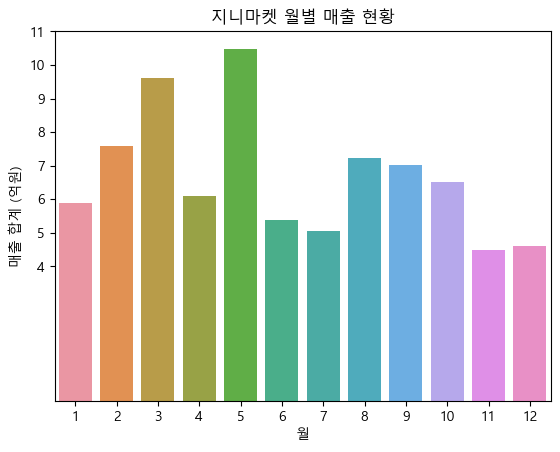

In [38]:
# seaborn 의 barplot 을 활용하여 월별 매출 현황이 어떠한지 시각화하는 부분입니다.
# 3월과 5월의 매출이 다른 달보다 확연히 높은 것을 확인할 수 있었습니다.

sns.barplot(data=df_mo, x="매출 월", y="수입합계")

tick_val = [400000000, 500000000, 600000000, 700000000, 800000000,
            900000000, 1000000000, 1100000000]
tick_lab = ['4','5', '6', '7', '8', '9', '10', '11']

plt.xlabel('월')
plt.ylabel('매출 합계 (억원)')
plt.title('지니마켓 월별 매출 현황')

plt.yticks(tick_val, tick_lab)

plt.show()

## 연도별 매출

In [39]:
# 다시 한번 아까 작업해둔 df_fin 에서 시작합니다.

df_fin

,주문번호,업체명,상품명,제조사,주문수량,판매금액,결제방법,주문일자,처리상태,초도상품,제작문구 내역,할부기간,주문연월,y-m
0,1.912132e+14,지니,eHBM셀파수학교실 비닐봉투-1세트 100장입,HB,1.0,5000,신용카드,2019-12-13 17:03:37,구매확정,N,NaN,NaN,0,19-12
1,1.912161e+14,지니,eHBM셀파수학교실 비닐봉투-1세트 100장입,HB,1.0,5000,신용카드,2019-12-16 10:04:50,구매확정,N,NaN,NaN,0,19-12
2,1.912161e+14,지니,eHBM셀파수학교실 삼색볼펜-1세트 50개입,HB,3.0,67500,신용카드,2019-12-16 10:04:50,구매확정,N,NaN,NaN,0,19-12
3,1.912162e+14,지니,eHBM셀파수학교실 회원용 리플렛-1세트 50권입,HB,2.0,30000,신용카드,2019-12-16 17:33:43,구매확정,N,NaN,NaN,0,19-12
4,1.912162e+14,지니,eHBM셀파수학교실-학습계통도(중등 5종),HB,1.0,750,신용카드,2019-12-16 17:33:43,구매확정,N,NaN,NaN,0,19-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170674,NaN,NaN,[스마트 HBM] 학습 전용 태블릿-정기결제,NaN,NaN,66000,NaN,NaT,NaN,NaN,NaN,NaN,35,NaN
170675,NaN,NaN,[스마트 HBM] 학습 전용 태블릿-정기결제,NaN,NaN,66000,NaN,NaT,NaN,NaN,NaN,NaN,34,NaN
170676,NaN,NaN,[스마트 HBM] 학습 전용 태블릿-정기결제,NaN,NaN,66000,NaN,NaT,NaN,NaN,NaN,NaN,35,NaN
170677,NaN,NaN,[스마트 HBM] 학습 전용 태블릿-정기결제,NaN,NaN,66000,NaN,NaT,NaN,NaN,NaN,NaN,34,NaN


In [40]:
# 19년, 20년, 21년, 22년도로 나눠 매출 합계를 구한 후, 새로운 데이터프레임 df_ye를 만드는 과정입니다.

Y19 = 0
Y20 = 0
Y21 = 0
Y22 = 0


for i in range(len(df_fin.index)):
    if df_fin['주문연월'][i] == 0:
        Y19 += df_fin['판매금액'][i]
        
    if 1 <= df_fin['주문연월'][i] and df_fin['주문연월'][i] <= 12:
        Y20 += df_fin['판매금액'][i]
        
    if 13 <= df_fin['주문연월'][i] and df_fin['주문연월'][i]<= 24:
        Y21 += df_fin['판매금액'][i]
        
    if 25 <= df_fin['주문연월'][i] and df_fin['주문연월'][i]<= 35:
        Y22 += df_fin['판매금액'][i]
        
        
ye = [Y19, Y20, Y21, Y22]
yearnm = [19,20,21,22]

yearex = {'매출 연도':  yearnm,
           '수입합계': ye}

df_ye = DataFrame(yearex)

print(df_ye)

   매출 연도        수입합계
0     19     5007580
1     20   678555575
2     21  2778798148
3     22  4533243035


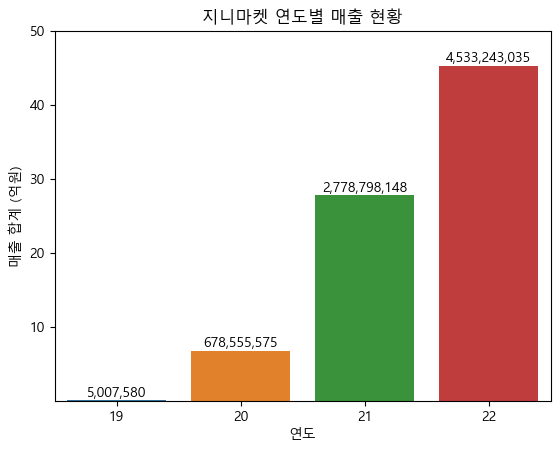

In [41]:
# 연도별 매출 현황을 나타내는 그래프를 표시하는 부분입니다.
# 19년 12월 중순부터 22년 11월까지의 정보만 포함하고 있음을 유의해야 합니다.
# 이 그래프에서 19년도의 수익은 거의 의미가 없습니다.
# 매출이 증가하는 추세에 있습니다.

sns.barplot(data=df_ye, x="매출 연도", y="수입합계")

tick_val = [1000000000, 2000000000, 3000000000, 4000000000, 5000000000]
tick_lab = ['10','20', '30', '40', '50']


plt.xlabel('연도')
plt.ylabel('매출 합계 (억원)')
plt.title('지니마켓 연도별 매출 현황')

plt.yticks(tick_val, tick_lab)

plt.text(0-0.24, Y19 + 50000000, format(Y19, ','))
plt.text(1-0.3, Y20 + 50000000, format(Y20, ','))
plt.text(2-0.34, Y21 + 50000000, format(Y21, ','))
plt.text(3-0.34, Y22 + 50000000, format(Y22, ','))

plt.show()

### 결제방법에 따른 결제금액 분석

In [42]:
df['결제방법'].unique()

array(['신용카드', '가상계좌', '후불', '무통장입금', nan, '신 + 포', '포인트', '신 + 적',
       '신 + 적 + 포', '적 + 포', '웰컴마일', '신 + 웰컴', '적립금', '후 + 포',
       '후 + 적 + 포', '후 + 적', '정 + 적', '정 + 적 + 포', '정기결제', '정 + 포',
       '현금간편결제', '현 + 포', '현 + 적', '현 + 적 + 포', '-', ' + 포'], dtype=object)

* 결제방법이 여러 조합일 경우, 맨 앞의 한가지만 사용한 것으로 간주한다고 하였습니다.
* 알 수 없는 값은 포함시키기 어렵기 때문에, nan값, '-', ' + 포' 의 세 종류는 제외하고 시작합니다.

In [43]:
# 원본 손실을 방지하기 위해 복사한 df3을 새로 생성합니다.

df3 = df.copy()

In [44]:
# 결제방법이 nan 값인 부분 확인합니다.

m = df3['결제방법'].isna()

In [45]:
# nan 값인 부분 제거합니다.

df3_1 = df3[-m]

In [46]:
# 결제방법이 - 인 항목을 확인합니다.

n = df3_1['결제방법'] == '-'

In [47]:
# 해당 부분을 제거합니다.

df3_1 = df3_1[-n]

In [48]:
# 결제방법이 ' + 포' 인 항목을 확인합니다.

o = df3_1['결제방법'] == ' + 포'

In [49]:
# 해당 부분을 제거합니다.

df3_1 = df3_1[-o]

* 나눠보자면, 신용카드, 가상계좌. 후불, 무통장입금, 포인트, 웰컴마일, 적립금, 정기결제, 현금간편결제의 9가지로 분류할 수 있습니다.

In [50]:
# 결제방법 분류의 편의를 위해 결제방법의 가장 앞글자만 추려서 '결제방법간편' 열을 만듭니다.

df3_1['결제방법간편'] = df3_1['결제방법'].apply(lambda x : x[0])

In [51]:
# '결제방법간편' 항목을 만들면서, 전체 데이터를 9가지 결제방법으로 분류하였습니다.

df3_1['결제방법간편'].unique()

array(['신', '가', '후', '무', '포', '적', '웰', '정', '현'], dtype=object)

* 여기서 짚고 넘어갈 점은 처리상태에 대한 부분입니다.
    * 실제 매출이 일어난 것만 분석해야 하는가 에 대한 논의가 있었습니다.
    * 제 경우에는 결제방법에 따른 결제 금액 그 자체만 보는 것이라고 생각하기 때문에
    * 처리상태는 고려하지 않기로 판단하였습니다.
* 또 하나의 문제로, 판매금액이 0인 데이터를 어떻게 할 것이냐는 부분입니다.
    * 쇼핑몰에서 판매금액이 0이라면, 실제로 구매가 이뤄지지 않았다고 판단했습니다.
    * 그러므로 판매금액이 0인 데이터는 전부 삭제하기로 하였습니다.

In [52]:
# 판매금액이 0인 데이터를 삭제하는 부분입니다.

p = df3_1['판매금액'] < 1

df3_1 = df3_1[-p]

In [53]:
# 데이터프레임의 인덱스가 중간이 비어있으므로, 초기화를 합니다.

df3_1 = df3_1.reset_index(drop=True)

* 이제 결제방식별로 추려냅니다.

In [54]:
li_신 = df3_1[df3_1['결제방법간편'] == '신']['판매금액']
li_가 = df3_1[df3_1['결제방법간편'] == '가']['판매금액']
li_후 = df3_1[df3_1['결제방법간편'] == '후']['판매금액']
li_무 = df3_1[df3_1['결제방법간편'] == '무']['판매금액']
li_포 = df3_1[df3_1['결제방법간편'] == '포']['판매금액']
li_적 = df3_1[df3_1['결제방법간편'] == '적']['판매금액']
li_웰 = df3_1[df3_1['결제방법간편'] == '웰']['판매금액']
li_정 = df3_1[df3_1['결제방법간편'] == '정']['판매금액']
li_현 = df3_1[df3_1['결제방법간편'] == '현']['판매금액']

* 값들이 정규분포를 따르는지 확인하기 위해 샤피로 - 윌크 테스트를 진행합니다.

In [55]:
stats.shapiro(li_신)

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.1954207420349121, pvalue=0.0)

In [56]:
stats.shapiro(li_가)

ShapiroResult(statistic=0.183829665184021, pvalue=2.0829461744829858e-14)

In [57]:
stats.shapiro(li_후)

ShapiroResult(statistic=0.7726168632507324, pvalue=7.41637444758624e-22)

In [58]:
stats.shapiro(li_무)

ShapiroResult(statistic=0.90102219581604, pvalue=0.4361543655395508)

In [59]:
stats.shapiro(li_포)

ShapiroResult(statistic=0.198431134223938, pvalue=0.0)

In [60]:
stats.shapiro(li_적)

ShapiroResult(statistic=0.2966819405555725, pvalue=0.0)

In [61]:
stats.shapiro(li_웰)

ShapiroResult(statistic=0.13118714094161987, pvalue=0.0)

In [62]:
stats.shapiro(li_정)

ShapiroResult(statistic=0.5707298517227173, pvalue=0.0)

In [63]:
stats.shapiro(li_현)

ShapiroResult(statistic=0.20835661888122559, pvalue=0.0)

* 갯수가 5000을 넘어 제대로 확인하기 어려운 것들이 있습니다.. QQ플롯을 확인합니다.

((array([-4.45600529, -4.26191256, -4.15650636, ...,  4.15650636,
          4.26191256,  4.45600529]),
  array([      60,       60,       60, ...,  9600000,  9600000, 11130000],
        dtype=int64)),
 (77733.47431396702, 43546.68466639762, 0.44193863480148216))

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


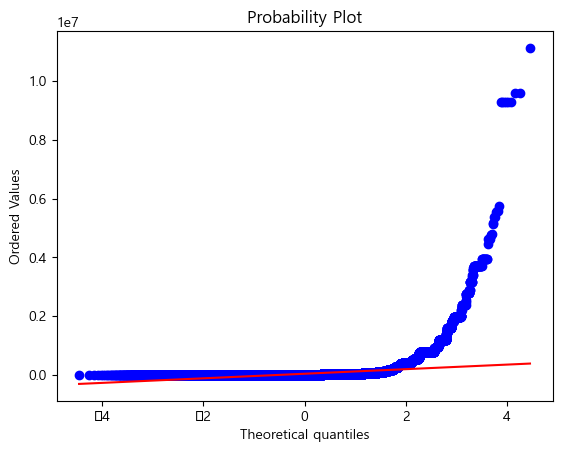

In [64]:
stats.probplot(li_신, plot = plt)

((array([-2.16261902, -1.78552545, -1.56210618, -1.397212  , -1.26342445,
         -1.1490787 , -1.04806126, -0.95674251, -0.87277802, -0.79455752,
         -0.72092154, -0.65100286, -0.58413203, -0.51977796, -0.45750906,
         -0.39696667, -0.33784646, -0.27988499, -0.22284956, -0.16653055,
         -0.11073524, -0.05528282,  0.        ,  0.05528282,  0.11073524,
          0.16653055,  0.22284956,  0.27988499,  0.33784646,  0.39696667,
          0.45750906,  0.51977796,  0.58413203,  0.65100286,  0.72092154,
          0.79455752,  0.87277802,  0.95674251,  1.04806126,  1.1490787 ,
          1.26342445,  1.397212  ,  1.56210618,  1.78552545,  2.16261902]),
  array([    100,     100,     100,     500,     700,     700,     700,
             700,     700,     700,     700,     900,    1300,    2000,
            3000,    4000,    4000,    5690,    6000,    6600,   10500,
           11000,   11000,   12000,   12500,   14000,   15000,   15000,
           15000,   15000,   15000,   15000,

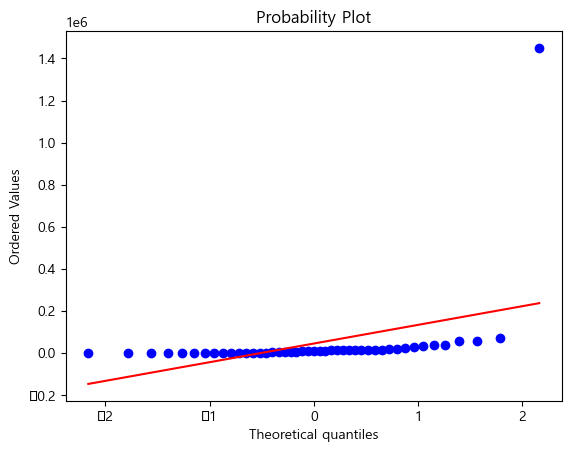

In [65]:
stats.probplot(li_가, plot = plt)

((array([-2.88603847, -2.59463516, -2.43004007, -2.31295397, -2.22096715,
         -2.14464549, -2.07908848, -2.02141102, -1.96976551, -1.92289476,
         -1.87990311, -1.840129  , -1.8030694 , -1.76833251, -1.73560699,
         -1.70464119, -1.67522863, -1.64719779, -1.6204045 , -1.59472641,
         -1.57005874, -1.54631106, -1.52340473, -1.50127095, -1.47984914,
         -1.45908568, -1.43893287, -1.41934808, -1.40029307, -1.38173334,
         -1.36363774, -1.34597796, -1.32872825, -1.31186509, -1.29536695,
         -1.27921405, -1.26338819, -1.24787258, -1.2326517 , -1.21771116,
         -1.2030376 , -1.18861859, -1.17444257, -1.16049871, -1.1467769 ,
         -1.1332677 , -1.1199622 , -1.10685208, -1.09392949, -1.08118705,
         -1.06861778, -1.05621511, -1.04397282, -1.03188502, -1.01994615,
         -1.00815092, -0.99649431, -0.98497155, -0.9735781 , -0.96230965,
         -0.9511621 , -0.9401315 , -0.92921412, -0.91840639, -0.90770489,
         -0.89710634, -0.88660761, -0.

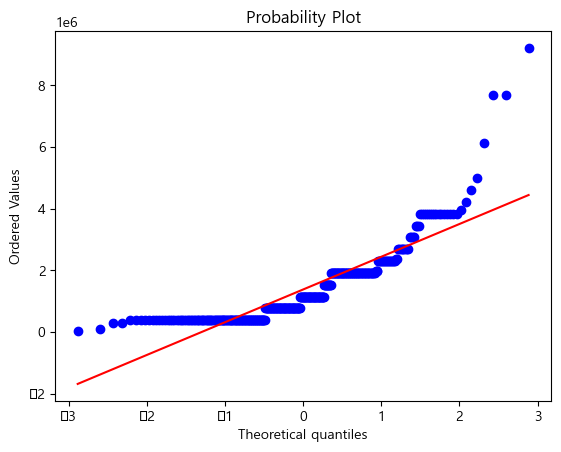

In [66]:
stats.probplot(li_후, plot = plt)

((array([-0.99814888, -0.29119142,  0.29119142,  0.99814888]),
  array([  850,  4800, 32000, 49500], dtype=int64)),
 (26121.858435408805, 21787.5, 0.9604947727025378))

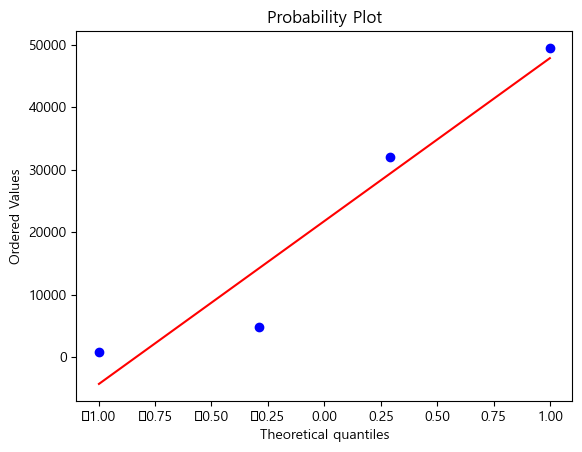

In [67]:
stats.probplot(li_무, plot = plt)

((array([-4.07217747, -3.86071728, -3.74520143, ...,  3.74520143,
          3.86071728,  4.07217747]),
  array([    100,     100,     100, ..., 1700000, 2159000, 2300000],
        dtype=int64)),
 (29678.789793011383, 20790.828685660537, 0.4451208918049585))

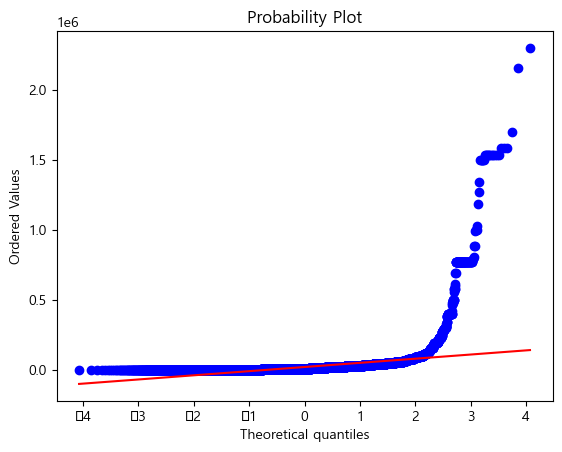

In [68]:
stats.probplot(li_포, plot = plt)

((array([-3.61335064, -3.37666762, -3.24615004, ...,  3.24615004,
          3.37666762,  3.61335064]),
  array([   100,    100,    100, ..., 396000, 396000, 792000], dtype=int64)),
 (11782.846667547588, 10840.568033144353, 0.5427120866474239))

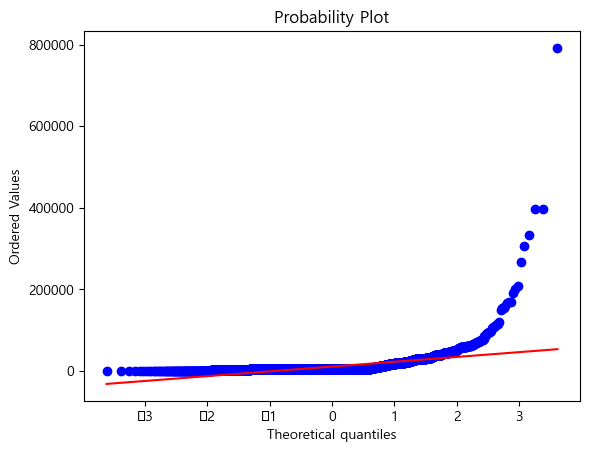

In [69]:
stats.probplot(li_적, plot = plt)

((array([-3.73845908, -3.50921952, -3.38317083, ...,  3.38317083,
          3.50921952,  3.73845908]),
  array([    120,     120,     120, ...,  948000, 2376000, 3168000],
        dtype=int64)),
 (20493.460725729292, 14443.581541338317, 0.3601514182554423))

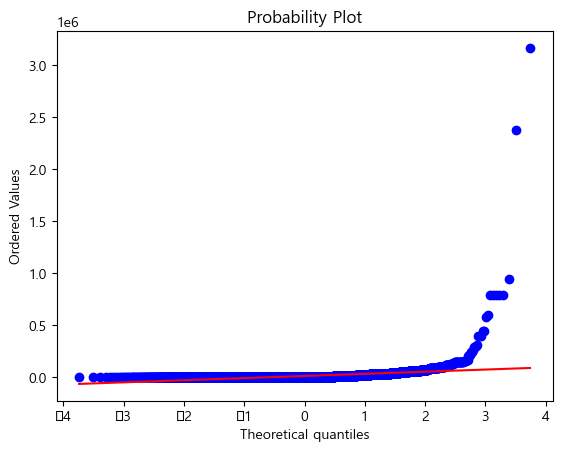

In [70]:
stats.probplot(li_웰, plot = plt)

((array([-3.3277363 , -3.07215117, -2.93011615, ...,  2.93011615,
          3.07215117,  3.3277363 ]),
  array([     600,      600,    10000, ...,  7920000,  7920000, 19800000],
        dtype=int64)),
 (722151.8987407677, 941815.0347441568, 0.7528978218880803))

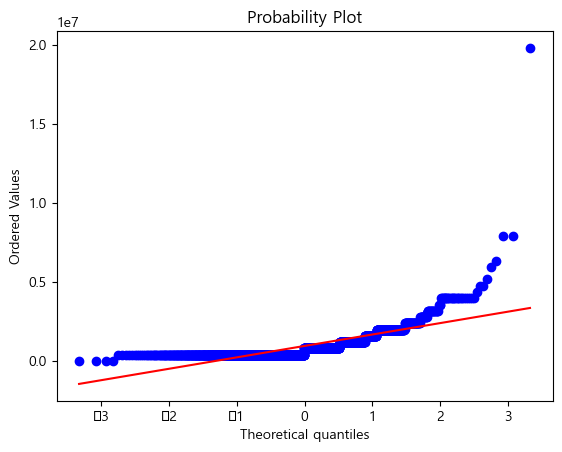

In [71]:
stats.probplot(li_정, plot = plt)

((array([-3.73371019, -3.50419648, -3.37798383, ...,  3.37798383,
          3.50419648,  3.73371019]),
  array([ 6.64387062,  6.64387062,  6.64387062, ..., 21.917069  ,
         21.917069  , 21.917069  ])),
 (2.059538298532287, 13.49183645681583, 0.978565612108782))

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


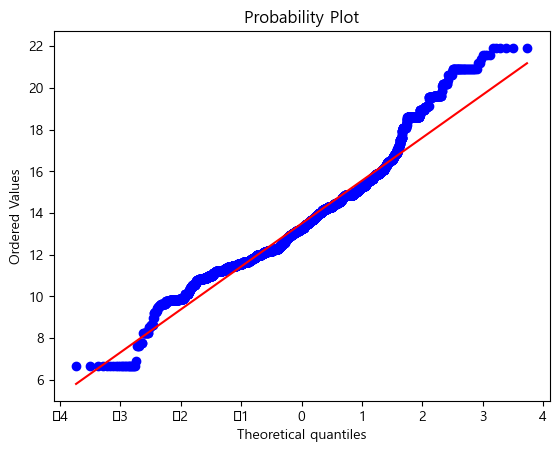

In [148]:
import math

li_현 = li_현.apply(lambda x : math.log2(x + 0.001))

stats.probplot(li_현, plot = plt)

* 많이 벗어나는 값들이 있지만 대부분의 경우에는 정규성을 만족한다고 봐도 될 것 같습니다.

* 그래프로도 확인해 보겠습니다.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


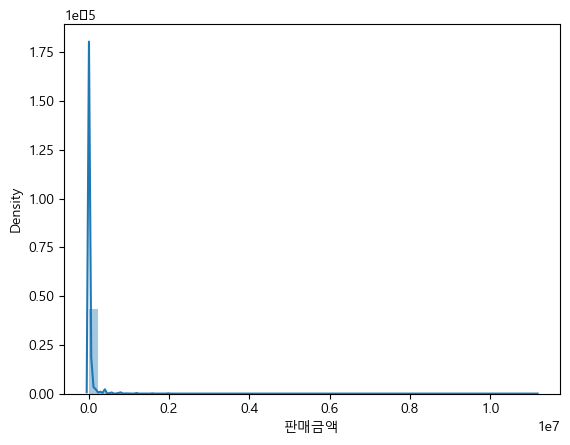

In [73]:
sns.distplot(li_신)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


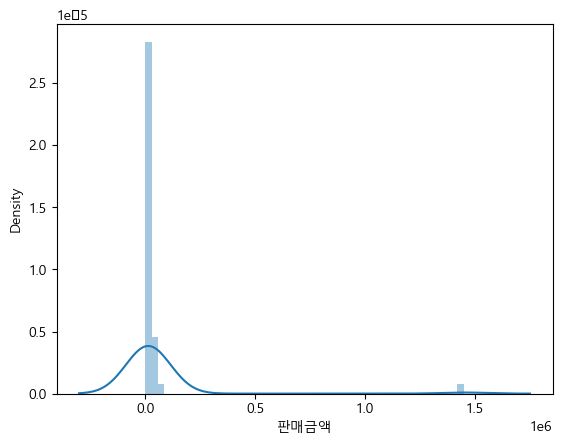

In [74]:
sns.distplot(li_가)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


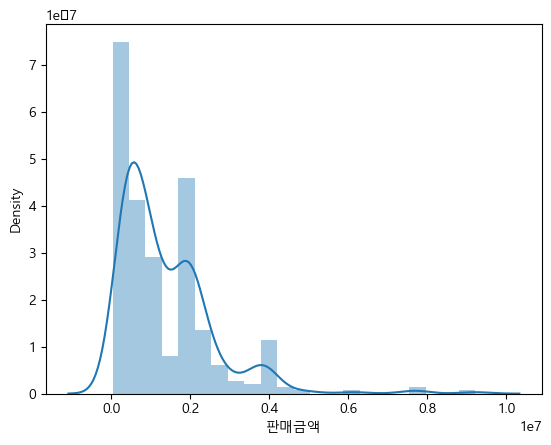

In [75]:
sns.distplot(li_후)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


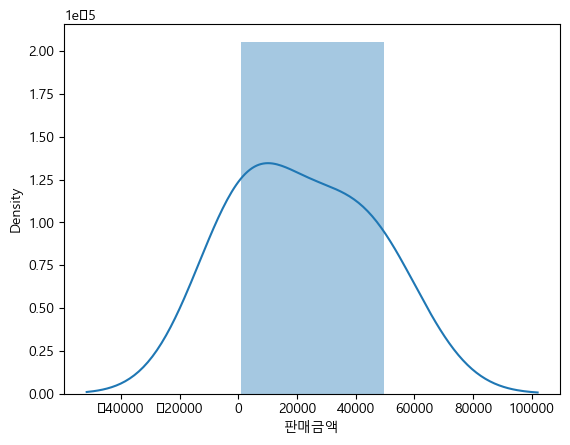

In [76]:
sns.distplot(li_무)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


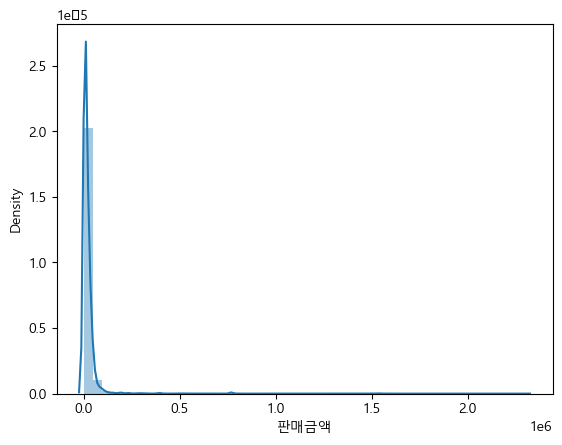

In [77]:
sns.distplot(li_포)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


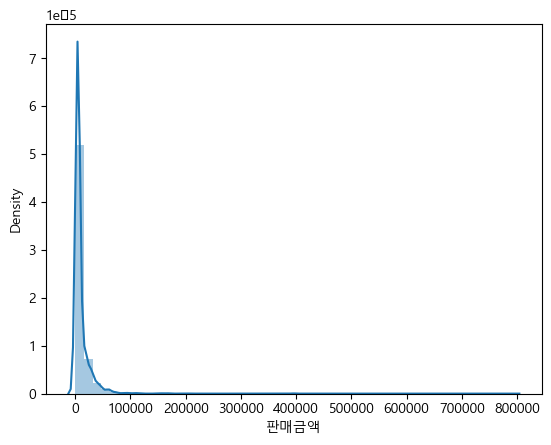

In [78]:
sns.distplot(li_적)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


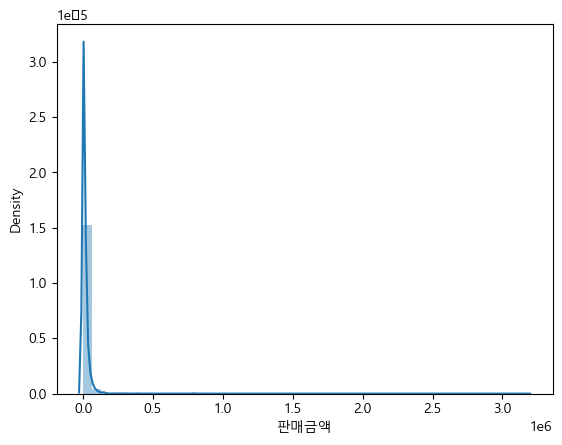

In [79]:
sns.distplot(li_웰)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


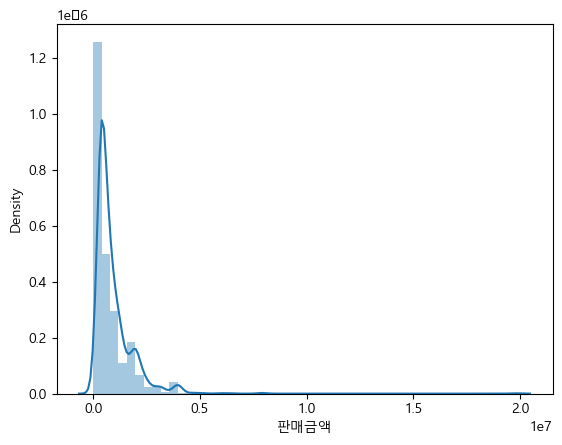

In [80]:
sns.distplot(li_정)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


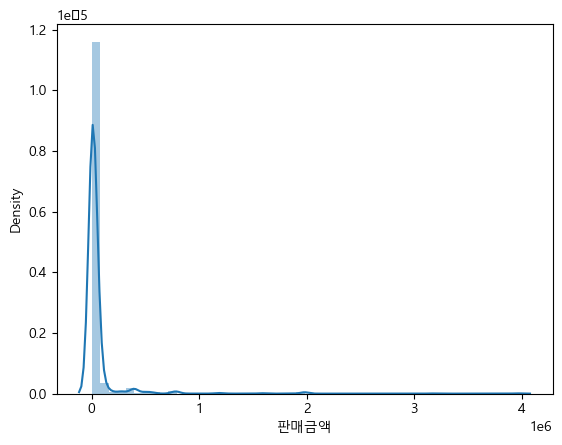

In [81]:
sns.distplot(li_현)
plt.show()

((array([-4.51329562, -4.32155733, -4.21750892, ...,  4.21750892,
          4.32155733,  4.51329562]),
  array([      60,       60,       60, ...,  9600000, 11130000, 19800000],
        dtype=int64)),
 (89706.67667869086, 47866.30495137941, 0.42699725881125167))

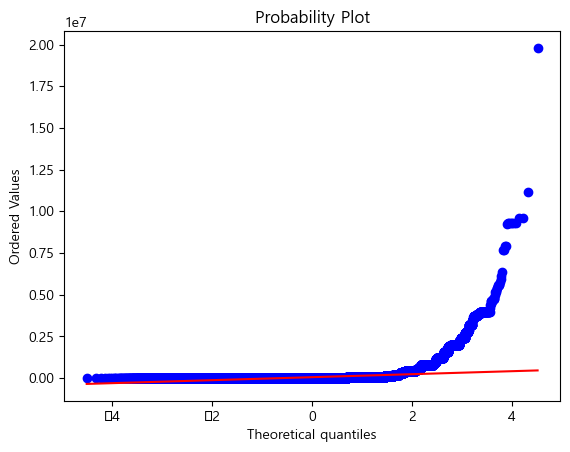

In [82]:
## 알아보기 힘들기 때문에 '판매금액' 컬럼 전체에 대해 확인하기로 한다.

stats.probplot(df3_1['판매금액'], plot = plt)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


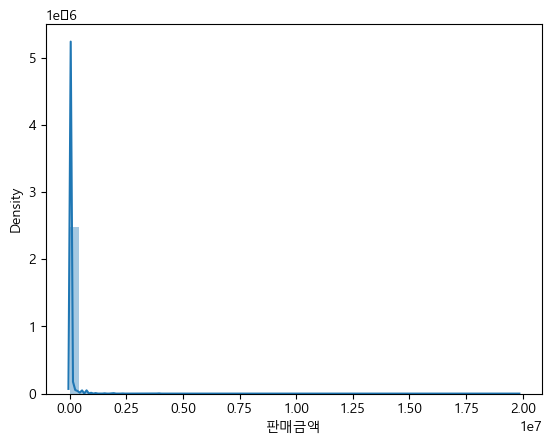

In [83]:
sns.distplot(df3_1['판매금액'])
plt.show()

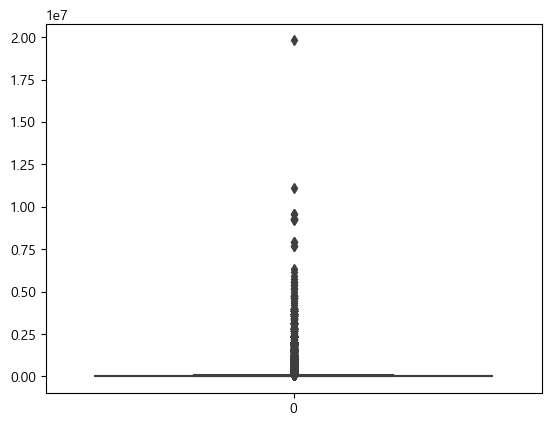

In [84]:
sns.boxplot(data = df3_1['판매금액'])
plt.show()

* 이상치가 너무 많은 것으로 판단됩니다.
* 이상치를 줄여 보기 위한 함수를 가져왔습니다.

In [85]:
# 이 부분은 너무 생각없이 자른거다.
# 전체 값에서 결제가 0인거 날리기
# 주문취소 등 날리기
# 너무 많이산 금액도 날아갈 수 있기 때문에 아래와 같은 방식은 중요한 정보를 날려버리게 된다.
# 

def outli(x):
    q1, q3 = np.percentile(x, [25, 75])
    iqr = q3 - q1
    low = q1 - (iqr * 1.5)
    high = q3 + (iqr * 1.5)
    
    return np.where((x > high)|(x < low))

out = outli(df3_1['판매금액'])

In [86]:
df3_1.loc[out, '판매금액']

2          67500
9         105000
10        105000
75         92800
77        105000
           ...  
217151    792000
217163     64800
217181     95000
217184     85500
217191    161500
Name: 판매금액, Length: 19658, dtype: int64

* 튀는 값들을 확인해 본 결과, 약 20000개 정도가 outlier로 확인되었습니다. 
* 전체 217192 개 중 20000개라면 약 10% 정도를 제외하게 되는 것인데, 이것이 맞는지는 알 수 없습니다.
* 하지만 제거하지 않으면 다음으로 진행하기 힘들기 때문에, 일단은 제거를 하고 계속 진행해 보겠습니다.

In [87]:
# out의 형식이 튜플 내부에 0번째에 array 형태로 되어 있기 때문에, 해당 부분을 list로 변환해 out에 저장해 줍니다.

out = out[0].tolist()

In [88]:
out

[2,
 9,
 10,
 75,
 77,
 83,
 84,
 218,
 224,
 230,
 235,
 236,
 237,
 238,
 331,
 338,
 357,
 385,
 457,
 459,
 497,
 633,
 693,
 695,
 709,
 798,
 811,
 816,
 840,
 856,
 914,
 1110,
 1122,
 1140,
 1141,
 1178,
 1179,
 1201,
 1205,
 1209,
 1213,
 1275,
 1333,
 1465,
 1467,
 1491,
 1515,
 1545,
 1588,
 1675,
 1677,
 1783,
 1972,
 1998,
 2048,
 2174,
 2184,
 2188,
 2194,
 2197,
 2233,
 2235,
 2365,
 2389,
 2408,
 2419,
 2445,
 2504,
 2505,
 2578,
 2584,
 2585,
 2587,
 2588,
 2596,
 2644,
 2670,
 2671,
 2797,
 2850,
 2903,
 2956,
 2998,
 3008,
 3044,
 3105,
 3114,
 3115,
 3130,
 3225,
 3257,
 3261,
 3288,
 3307,
 3308,
 3354,
 3406,
 3591,
 3592,
 3628,
 3629,
 3635,
 3638,
 3714,
 3747,
 3755,
 3757,
 3795,
 3859,
 3874,
 3924,
 3926,
 3927,
 4018,
 4138,
 4139,
 4152,
 4166,
 4168,
 4169,
 4180,
 4181,
 4211,
 4246,
 4247,
 4255,
 4258,
 4259,
 4317,
 4398,
 4399,
 4402,
 4413,
 4414,
 4419,
 4420,
 4432,
 4433,
 4560,
 4597,
 4600,
 4601,
 4603,
 4632,
 4770,
 4772,
 4813,
 4821,
 482

In [89]:
# outlier 를 제거한 데이터프레임 df3_2를 만듭니다.

df3_2 = df3_1.drop(index = out, axis = 0)

In [90]:
df3_2

,주문번호,업체명,상품명,제조사,주문수량,판매금액,결제방법,주문일자,처리상태,초도상품,제작문구 내역,할부기간,결제방법간편
0,191213170236874,지니,eHBM셀파수학교실 비닐봉투-1세트 100장입,HB,1,5000,신용카드,2019-12-13 17:03:37,구매확정,N,NaN,NaN,신
1,191216100347429,지니,eHBM셀파수학교실 비닐봉투-1세트 100장입,HB,1,5000,신용카드,2019-12-16 10:04:50,구매확정,N,NaN,NaN,신
3,191216173241622,지니,eHBM셀파수학교실 회원용 리플렛-1세트 50권입,HB,2,30000,신용카드,2019-12-16 17:33:43,구매확정,N,NaN,NaN,신
4,191216173241622,지니,eHBM셀파수학교실-학습계통도(중등 5종),HB,1,750,신용카드,2019-12-16 17:33:43,구매확정,N,NaN,NaN,신
5,191216173241622,지니,"eHBM셀파수학교실 종이컵-1박스 1,000개입",HB,1,16000,신용카드,2019-12-16 17:33:43,구매확정,N,NaN,NaN,신
...,...,...,...,...,...,...,...,...,...,...,...,...,...
217186,221108103722743,다우기술,[신세계] 신세계 상품권-1만원권,신세계,1,9600,신용카드,2022-11-08 10:35:02,배송완료,N,NaN,NaN,신
217187,221108104041264,에이스디포,[스마트 HBE*초도] 입체 액자형 현판,에이스디포,1,35000,웰컴마일,2022-11-08 10:38:21,결제완료,Y,NaN,NaN,웰
217188,221108104041264,에이스디포,[스마트 HBE*초도] 아크릴 사인,HB,1,26900,웰컴마일,2022-11-08 10:38:21,결제완료,Y,NaN,NaN,웰
217189,221108104536307,에이스디포,[스마트 HBM] 아크릴 사인,HB,1,26900,신 + 포,2022-11-08 10:43:15,배송준비,N,NaN,NaN,신


In [91]:
# 이 자료를 가지고 위에서 진행한 테스트를 다시 한 번 진행합니다.

li_신2 = df3_2[df3_2['결제방법간편'] == '신']['판매금액']
li_가2 = df3_2[df3_2['결제방법간편'] == '가']['판매금액']
li_후2 = df3_2[df3_2['결제방법간편'] == '후']['판매금액']
li_무2 = df3_2[df3_2['결제방법간편'] == '무']['판매금액']
li_포2 = df3_2[df3_2['결제방법간편'] == '포']['판매금액']
li_적2 = df3_2[df3_2['결제방법간편'] == '적']['판매금액']
li_웰2 = df3_2[df3_2['결제방법간편'] == '웰']['판매금액']
li_정2 = df3_2[df3_2['결제방법간편'] == '정']['판매금액']
li_현2 = df3_2[df3_2['결제방법간편'] == '현']['판매금액']

((array([-4.43478739, -4.23980818, -4.13388999, ...,  4.13388999,
          4.23980818,  4.43478739]),
  array([   60,    60,    60, ..., 62000, 62100, 62100], dtype=int64)),
 (12816.671277875781, 14013.64968720291, 0.9096285893915262))

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


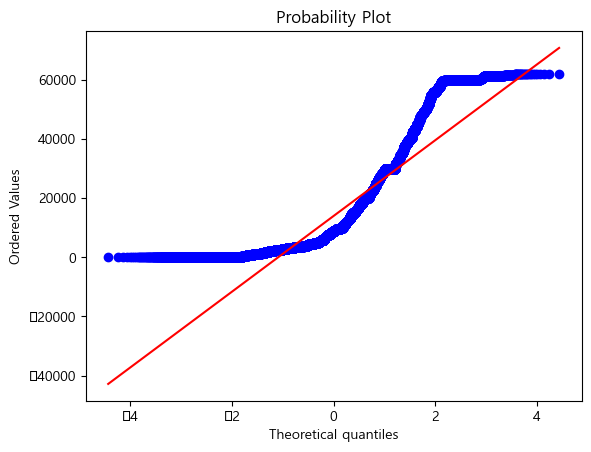

In [92]:
stats.probplot(li_신2, plot = plt)

((array([-2.14464865, -1.76480145, -1.53935652, -1.37272638, -1.23734893,
         -1.12149384, -1.01901077, -0.9262463 , -0.84083899, -0.7611654 ,
         -0.686055  , -0.6146308 , -0.54621419, -0.48026516, -0.41634304,
         -0.35407972, -0.29316075, -0.23331163, -0.17428744, -0.11586477,
         -0.05783525,  0.        ,  0.05783525,  0.11586477,  0.17428744,
          0.23331163,  0.29316075,  0.35407972,  0.41634304,  0.48026516,
          0.54621419,  0.6146308 ,  0.686055  ,  0.7611654 ,  0.84083899,
          0.9262463 ,  1.01901077,  1.12149384,  1.23734893,  1.37272638,
          1.53935652,  1.76480145,  2.14464865]),
  array([  100,   100,   100,   500,   700,   700,   700,   700,   700,
           700,   700,   900,  1300,  2000,  3000,  4000,  4000,  5690,
          6000,  6600, 10500, 11000, 11000, 12000, 12500, 14000, 15000,
         15000, 15000, 15000, 15000, 15000, 16000, 16000, 18000, 22000,
         25000, 32000, 34900, 40000, 40000, 56500, 56500], dtype=int64

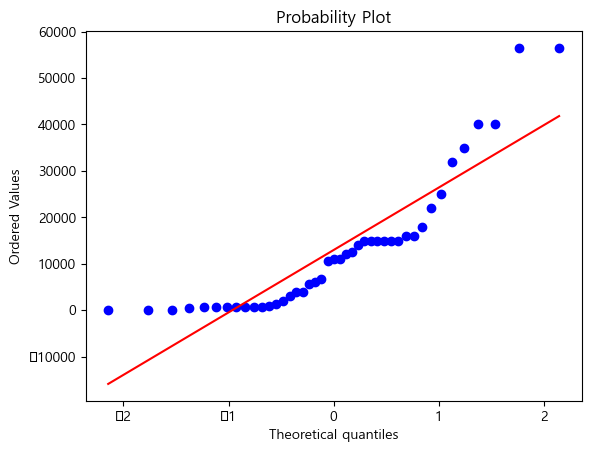

In [93]:
stats.probplot(li_가2, plot = plt)

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_stats_mstats_common.py:181: RuntimeWarning: invalid value encountered in double_scalars
  slope = ssxym / ssxm
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_stats_mstats_common.py:195: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*(1.0 + r + TINY)))
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_stats_mstats_common.py:198: RuntimeWarning: invalid value encountered in double_scalars
  slope_stderr = np.sqrt((1 - r**2) * ssym / ssxm / df)


((array([0.]), array([30000], dtype=int64)), (nan, nan, 0.0))

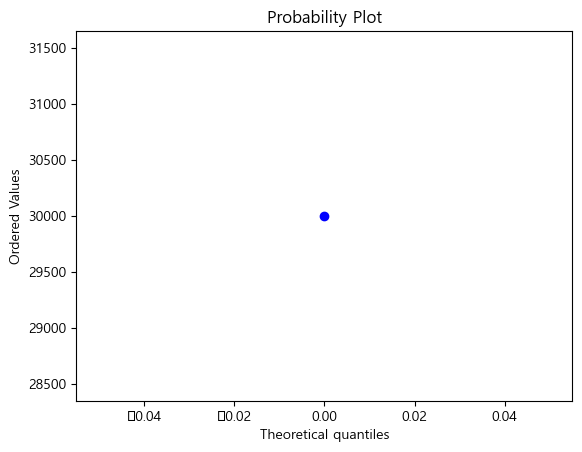

In [94]:
stats.probplot(li_후2, plot = plt)

((array([-0.99814888, -0.29119142,  0.29119142,  0.99814888]),
  array([  850,  4800, 32000, 49500], dtype=int64)),
 (26121.858435408805, 21787.5, 0.9604947727025378))

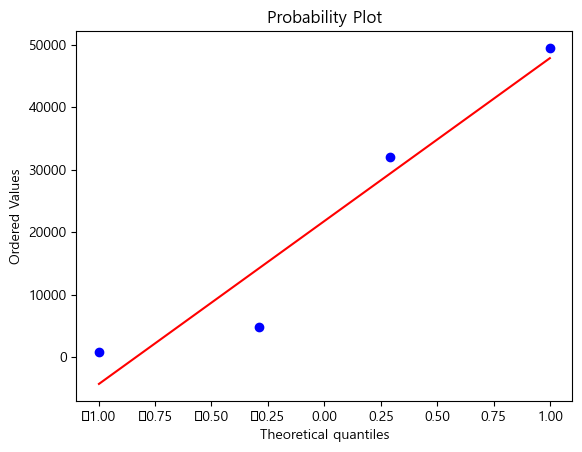

In [95]:
stats.probplot(li_무2, plot = plt)

((array([-4.06347337, -3.85158392, -3.73581601, ...,  3.73581601,
          3.85158392,  4.06347337]),
  array([  100,   100,   100, ..., 62100, 62100, 62100], dtype=int64)),
 (12572.517142888286, 13680.423569211458, 0.9225558977819055))

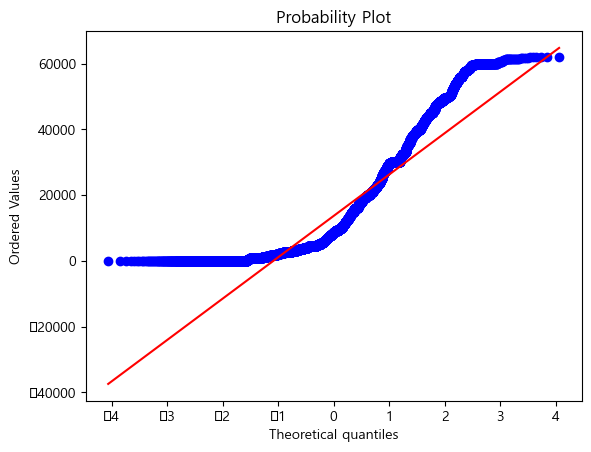

In [96]:
stats.probplot(li_포2, plot = plt)

((array([-3.60993626, -3.37304347, -3.24239941, ...,  3.24239941,
          3.37304347,  3.60993626]),
  array([  100,   100,   100, ..., 61900, 61900, 62100], dtype=int64)),
 (7966.264230569067, 9252.058108705258, 0.7718020680699647))

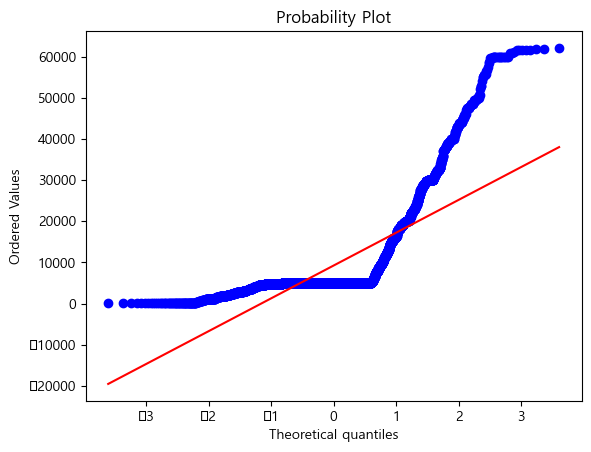

In [97]:
stats.probplot(li_적2, plot = plt)

((array([-3.72994594, -3.50021446, -3.37387154, ...,  3.37387154,
          3.50021446,  3.72994594]),
  array([  120,   120,   120, ..., 61500, 61500, 61600], dtype=int64)),
 (9582.587637527675, 9846.655844155845, 0.796188465747024))

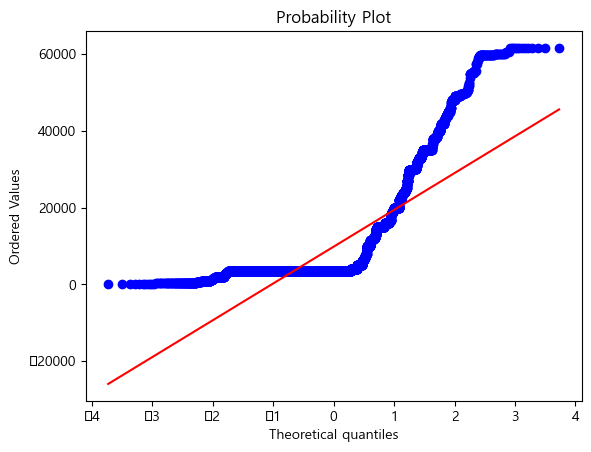

In [98]:
stats.probplot(li_웰2, plot = plt)

((array([-0.99814888, -0.29119142,  0.29119142,  0.99814888]),
  array([  600,   600, 10000, 10000], dtype=int64)),
 (5605.341872981077, 5300.0, 0.8768411132783642))

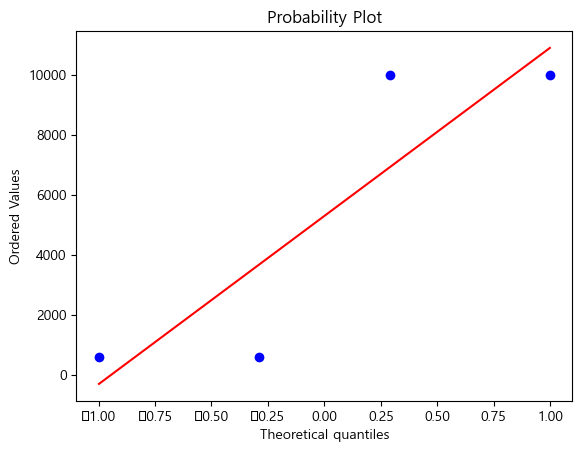

In [99]:
stats.probplot(li_정2, plot = plt)

((array([-3.70770471, -3.47667824, -3.34956001, ...,  3.34956001,
          3.47667824,  3.70770471]),
  array([  100,   100,   100, ..., 61800, 61800, 61800], dtype=int64)),
 (12163.656001898169, 13663.816385033193, 0.9043855291675684))

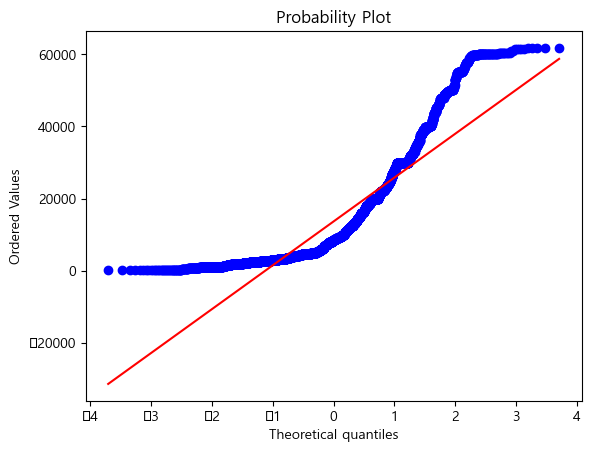

In [100]:
stats.probplot(li_현2, plot = plt)

* 확인한 결과, 유의미하게 차이를 확인할 수 있는 그룹은 신용카드, 가상계좌. 포인트, 웰컴마일, 적립금, 현금간편결제의 여섯 개로 판단됩니다.

* 일단 아래의 결과는 각각의 ks test 결과이지만, 애초에 이 자료 전체는 같은 모집단에서 유래했기 때문에, p-value가 높게 나온다고 하여도 의미는 없는 것으로 생각됩니다.

In [101]:
for i in [li_신2, li_웰2, li_적2, li_포2, li_현2]:
    print(stats.ks_2samp(li_가2, i))
    print()

KstestResult(statistic=0.22698835222577357, pvalue=0.01984363851442217)

KstestResult(statistic=0.3094616912034032, pvalue=0.0003915950250592552)

KstestResult(statistic=0.33973733159317226, pvalue=6.867015378226698e-05)

KstestResult(statistic=0.19404204100932812, pvalue=0.06814693986568099)

KstestResult(statistic=0.26626643836577735, pvalue=0.0036510162194777684)



In [102]:
for i in [li_웰2, li_적2, li_포2, li_현2]:
    print(stats.ks_2samp(li_신2, i))
    print()

KstestResult(statistic=0.3527816194971715, pvalue=0.0)

KstestResult(statistic=0.34621928972351546, pvalue=0.0)

KstestResult(statistic=0.05243012261159677, pvalue=5.6375516463767004e-58)

KstestResult(statistic=0.04472956450430106, pvalue=1.7860586257417297e-11)



In [103]:
for i in [li_적2, li_포2, li_현2]:
    print(stats.ks_2samp(li_웰2, i))
    print()

KstestResult(statistic=0.5462797795842803, pvalue=5.63e-322)

KstestResult(statistic=0.34036336413990237, pvalue=0.0)

KstestResult(statistic=0.38317003750239925, pvalue=0.0)



In [104]:
for i in [li_포2, li_현2]:
    print(stats.ks_2samp(li_적2, i))
    print()

KstestResult(statistic=0.3252326093860497, pvalue=0.0)

KstestResult(statistic=0.34247075370333974, pvalue=3.291885321124372e-280)



In [105]:
print(stats.ks_2samp(li_포2, li_현2))

KstestResult(statistic=0.08786533336872152, pvalue=1.29091481095287e-36)


* 가상계좌와 포인트 간의 한 경우에서만 p-value가 0.06으로, 다른 모집단에 소속될 확률이 있다고 결과를 보였지만, 애초에 같은 모집단에서 나온 결과물들이므로, 그다지 의미가 없다고 생각할 수 있습니다.

In [106]:
# 가상계좌와 적립금 결제 사이에 유의미한 통계적 차이 존재

for i in [li_신2, li_웰2, li_적2, li_포2, li_현2]:
    print(stats.ttest_ind(li_가2, i))
    print()

Ttest_indResult(statistic=-0.49235930193963634, pvalue=0.6224660830184887)

Ttest_indResult(statistic=1.6872732770725138, pvalue=0.09159366252860282)

Ttest_indResult(statistic=2.332588513018665, pvalue=0.01971297373064951)

Ttest_indResult(statistic=-0.348521383069323, pvalue=0.7274512130855286)

Ttest_indResult(statistic=-0.3441522341529208, pvalue=0.7307426528121758)



In [107]:
# 전체 경우에서 유의미한 통계적 차이 존재.

for i in [li_웰2, li_적2, li_포2, li_현2]:
    print(stats.ttest_ind(li_신2, i))
    print()

Ttest_indResult(statistic=24.73116874281719, pvalue=8.95108897553754e-135)

Ttest_indResult(statistic=22.55459808916343, pvalue=1.8389180757887947e-112)

Ttest_indResult(statistic=3.689347558733061, pvalue=0.00022489640024065156)

Ttest_indResult(statistic=1.98203711481127, pvalue=0.04747682716212845)



In [108]:
# 전체 경우에서 유의미한 통계적 차이 존재

for i in [li_적2, li_포2, li_현2]:
    print(stats.ttest_ind(li_웰2, i))
    print()

Ttest_indResult(statistic=2.752060482851954, pvalue=0.0059312311625388395)

Ttest_indResult(statistic=-21.880173138514643, pvalue=1.964478913403997e-105)

Ttest_indResult(statistic=-17.643501432724733, pvalue=6.457279552053095e-69)



In [109]:
# 전체 경우에서 유의미한 통계적 차이 존재

for i in [li_포2, li_현2]:
    print(stats.ttest_ind(li_적2, i))
    print()

Ttest_indResult(statistic=-20.93711212427724, pvalue=1.0390673721697232e-96)

Ttest_indResult(statistic=-18.64535882376584, pvalue=1.9881513286455574e-76)



In [110]:
# 유의미한 차이 없음

print(stats.ttest_ind(li_포2, li_현2))

Ttest_indResult(statistic=0.08964807561517893, pvalue=0.9285673879798884)


* 이상치가 너무 많이 나와 문제가 있는 것 같은데.. 해결 방법이 궁금하다.

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

적 v.s. 웰: t-test independent samples with Bonferroni correction, P_val=5.931e-02 stat=-2.752e+00
포 v.s. 적: t-test independent samples with Bonferroni correction, P_val=1.039e-95 stat=2.094e+01
포 v.s. 웰: t-test independent samples with Bonferroni correction, P_val=1.964e-104 stat=2.188e+01
가 v.s. 적: t-test independent samples with Bonferroni correction, P_val=1.971e-01 stat=2.333e+00
신 v.s. 포: t-test independent samples with Bonferroni correction, P_val=2.249e-03 stat=3.689e+00
웰 v.s. 현: t-test independent samples with Bonferroni correction, P_val=6.457e-68 stat=-1.764e+01
신 v.s. 적: t-test independent samples with Bonferroni correction, P_val=1.839e-111 stat=2.255e+01
적 v.s. 현: t-test independent samples with Bonferroni correction, P_val=1.988e-75 stat=-1.865e+01
신 v.s. 웰: t-test independent samples with Bonferroni correction

(<AxesSubplot:xlabel='결제방법간편', ylabel='판매금액'>,
  <statannot.StatResult.StatResult at 0x17d05a13520>])

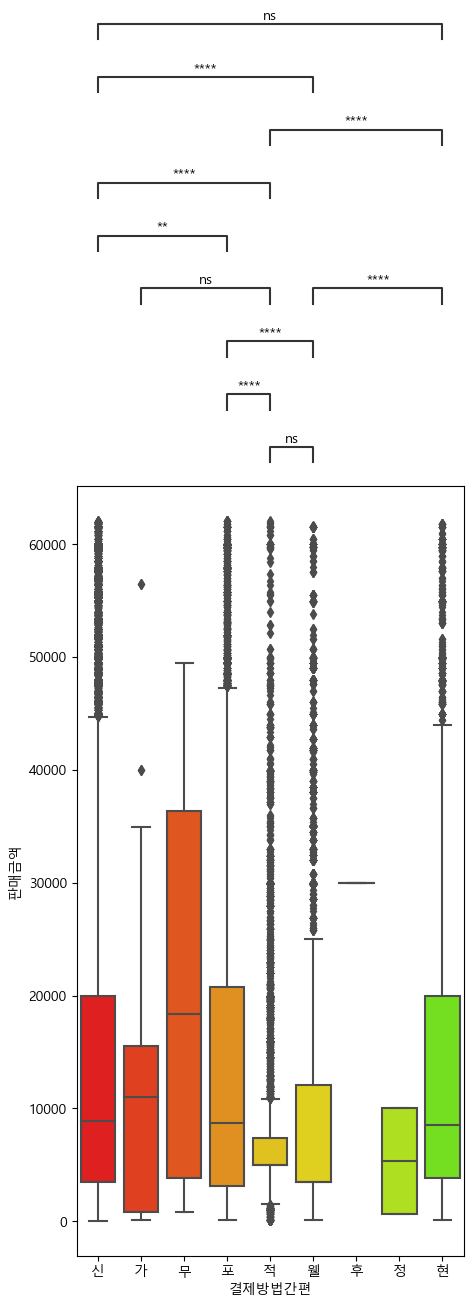

In [111]:
#신용카드, 가상계좌. 후불, 무통장입금, 포인트, 웰컴마일, 적립금, 정기결제, 현금간편결제

plt.figure(figsize=(5,10))
ax = plt.subplot()
ax = sns.boxplot(x = '결제방법간편' , y = '판매금액', data = df3_2, palette = 'prism')


# ax =  figure 이름
# data = 분석할 데이터 (여기서는 데이터프레임 형식)
# x = x 축에 위치할 정보 (여기서는 column 이름)
# y = y 축에 위치할 정보 (여기서는 column 이름)
# box_pairs = 분석할 박스플롯의 쌍을 입력 (리스트로 입력받음, 한 쌍마다 튜플로 묶어둠)
# test =  분석할 T - test 의 종류, 모를 경우 여기에 아무거나 입력하고 에러를 발생시키면 가능한 경우를 알려줌
# text_format = T - test 경과를 별 표시로 알려줌, return 창에 관련 정보를 함께 띄워줌
# loc = 도표 내부에 표시할건지 외부에 표시할건지
# verbose = return 창에 관련 설명을 어디까지 표시할건지 
# 혹시 뭐 넣을지 기억 안나면 해당 칸을 빈칸으로 놓고 에러메시지를 보면 설명이 써 있다.

add_stat_annotation(ax, 
                    data = df3_2,
                    x = '결제방법간편' ,
                    y = '판매금액',
                    box_pairs = [('가','적'),
                                 ('신','웰'),
                                 ('신','적'),
                                 ('신','포'),
                                 ('신','현'),
                                 ('웰','적'),
                                 ('웰','포'),
                                 ('웰','현'),
                                 ('적','포'),
                                 ('적','현')],
                    test = 't-test_ind', 
                    text_format = 'star', 
                    loc = 'outside',
                    verbose = 2)

In [137]:
import math

df3_2['판매금액로그'] = df3_2['판매금액'].apply(lambda x : math.log2(x + 0.001))

In [139]:
def ty(x):
    if x == '신':
        return '카드'
    if x == '가':
        return "가상"
    if x == '후':
        return '후불'
    if x == '무':
        return '무통장'
    if x == '포' or x == '적' or x == '웰':
        return '포인트'
    if x == '정':
        return '정기'
    if x == '현':
        return '현금'
    
df3_2['결제방법간편'] = df3_2['결제방법간편'].apply(lambda x : ty(x))

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

카드 v.s. 가상: Welch's t-test independent samples with Bonferroni correction, P_val=1.000e+00 stat=4.761e-01
카드 v.s. 무통장: Welch's t-test independent samples with Bonferroni correction, P_val=1.000e+00 stat=-6.734e-01
카드 v.s. 포인트: Welch's t-test independent samples with Bonferroni correction, P_val=3.625e-90 stat=2.025e+01
카드 v.s. 후불: Welch's t-test independent samples with Bonferroni correction, P_val=nan stat=nan
카드 v.s. 정기: Welch's t-test independent samples with Bonferroni correction, P_val=2.934e-01 stat=3.211e+00
카드 v.s. 현금: Welch's t-test independent samples with Bonferroni correction, P_val=2.315e-01 stat=2.069e+00


C:\ProgramData\Anaconda3\lib\site-packages\statannot\statannot.py:109: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  stat, pval = stats.ttest_ind(
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_stats_py.py:1250: RuntimeWarning: divide by zero encountered in true_divide
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_stats_py.py:1250: RuntimeWarning: invalid value encountered in double_scalars
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero


(<AxesSubplot:xlabel='결제방법간편', ylabel='판매금액'>,
  <statannot.StatResult.StatResult at 0x17d0ee7ca60>])

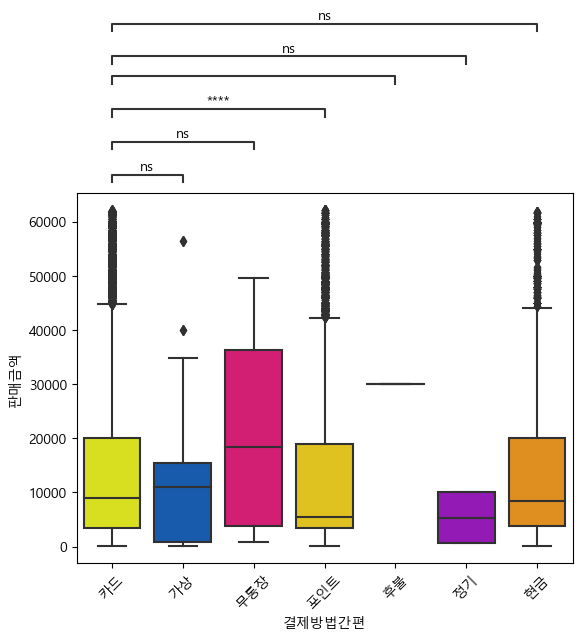

In [147]:
ax = plt.subplot()
ax = sns.boxplot(data = df3_2 , x = "결제방법간편", y = '판매금액', palette = 'prism')

plt.xticks(rotation=45)

add_stat_annotation(ax, 
                    data = df3_2,
                    x = '결제방법간편' ,
                    y = '판매금액',
                    box_pairs = [('카드','가상'),
                                 ('카드','무통장'),
                                 ('카드','포인트'),
                                 ('카드','후불'),
                                 ('카드','정기'),
                                 ('카드','현금'),
                                 ],
                    test = 't-test_welch', 
                    text_format = 'star', 
                    loc = 'outside',
                    verbose = 2)

## 사용자의 충성도 분류

In [112]:
# 사용자 별 데이터가 없어서 품목별로 유추할 수 밖에 없다고 하셨는데, 항목이 너무 다양해서 할 수 없었습니다.
# 업체명 항목이 사용자라고 가정하면 충성도를 분류할 수 있을 것 같습니다.

In [113]:
df

,주문번호,업체명,상품명,제조사,주문수량,판매금액,결제방법,주문일자,처리상태,초도상품,제작문구 내역,할부기간
0,191213170236874,지니,eHBM셀파수학교실 비닐봉투-1세트 100장입,HB,1,5000,신용카드,2019-12-13 17:03:37,구매확정,N,NaN,NaN
1,191216100347429,지니,eHBM셀파수학교실 비닐봉투-1세트 100장입,HB,1,5000,신용카드,2019-12-16 10:04:50,구매확정,N,NaN,NaN
2,191216100347429,지니,eHBM셀파수학교실 삼색볼펜-1세트 50개입,HB,3,67500,신용카드,2019-12-16 10:04:50,구매확정,N,NaN,NaN
3,191216173241622,지니,eHBM셀파수학교실 회원용 리플렛-1세트 50권입,HB,2,30000,신용카드,2019-12-16 17:33:43,구매확정,N,NaN,NaN
4,191216173241622,지니,eHBM셀파수학교실-학습계통도(중등 5종),HB,1,750,신용카드,2019-12-16 17:33:43,구매확정,N,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
218596,221108104041264,에이스디포,[스마트 HBE*초도] 입체 액자형 현판,에이스디포,1,35000,웰컴마일,2022-11-08 10:38:21,결제완료,Y,NaN,NaN
218597,221108104041264,에이스디포,[스마트 HBE*초도] 아크릴 사인,HB,1,26900,웰컴마일,2022-11-08 10:38:21,결제완료,Y,NaN,NaN
218598,221108104536307,에이스디포,[스마트 HBM] 아크릴 사인,HB,1,26900,신 + 포,2022-11-08 10:43:15,배송준비,N,NaN,NaN
218599,221108104735216,다우기술,[스타벅스] 아이스 카페 아메리카노 T,스타벅스,1,4050,포인트,2022-11-08 10:45:14,배송완료,N,NaN,NaN


In [114]:
# 확실하게 구매를 완료한 기록이 있는 업체만 선정합니다.
df_4 = df[df['처리상태'] == '구매확정']

In [115]:
# 업체는 총 84 곳이 존재합니다.

df_4['업체명'].unique()

array(['지니', '쥬크박스', '조이스', '라온웍스', '산스토어', '유앤알코리아', '네오필립', '거영아이앤디',
       '가이스파트너스', '레인트리', '빅픽처', '에이스디포', '로렌츄컴퍼니', '피플이엔티', '비즈마켓렌탈',
       '플레이피에스마케팅', '퍼스트엔터테인먼트', '스테툴스', '와이앤제이', '한민유통', '블루스톤익스체인지',
       '아이엔리테일', '드림빌', '애쓰다', '럭스럭스', '라씨오날에듀', '가베', '이든교육', '에스아이상사',
       '피에이엔글로벌', '이선생자석교구', '사이언스스타', '뮤템', '와니사이언스', '더싸다닷컴', '준디자인',
       '오피스퀵', '행복한바오밥', '보드엠', '페트라기업', '트리인천신현지사', '리틀램스쿨', '그린피앤에스',
       '청화', '디자인다소', '아토코리아', '지니 태블릿', '다우기술', '래시드', '이트너스', '싱크로드코리아',
       '엔에이치엔에듀', '유쾌한생각', '스낵포', '마스크공작소', '모든오피스', '셀러테스트', '프린피아',
       '뉴트리원', '알파', '로즈마켓', '천재태블릿', '일이테크', '비전플레이스', '주식회사 티앤티솔루션',
       '채널씨엔씨', '티셀-유아', '지니 태블릿(후불집행)', '애플나라샵', '티셀-도서', '헬스하우스',
       '리얼리티리테일코리아', '석빙고', '만들기대장', '링커블테크놀러지', '매직북스', '플레이스마터',
       '인테이크 주식회사', '오피스허브', '리체', '메디쿼터스', '바나나코퍼레이션', '맨도롱', '이루커머스'],
      dtype=object)

In [116]:
# 존재하는 업체명을 리스트로 받아냅니다.

cl_li = df_4['업체명'].unique().tolist()

In [117]:
# 타입이 리스트임을 다시 한번 확인합니다.

type(cl_li)

list

In [118]:
# 업체의 그룹을 나타낼 수 있는 새로운 데이터프레임 df_client 을 만든다.

df_client = pd.DataFrame({'업체명':cl_li})

In [119]:
df_client

,업체명
0,지니
1,쥬크박스
2,조이스
3,라온웍스
4,산스토어
...,...
79,리체
80,메디쿼터스
81,바나나코퍼레이션
82,맨도롱


* 얼마나 최근에 구매했는가? (Recency)
    * 자료의 마지막 날짜가 22년 11월 8일이므로, 1년 이내 구매 기록이 있다면 1, 구매 기록이 없다면 0을 부여합니다. 

In [120]:
# 아래의 총 67개 업체가 1년 이내 구매 기록이 있는 업체입니다. 해당 업체 정보를 리스트로 받습니다.
# pd.Timestamp를 활용하여 시간 자체를 비교해 볼 수 있습니다.

Re_li = df_4[df_4['주문일자'] > pd.Timestamp('2021-11-08 00:00:00')]['업체명'].unique().tolist()

In [121]:
# 전체 업체들 중, 위의 리스트에 포함되면 1, 포함되지 않으면 0을 넣습니다.

df_client['Recency'] = [1 if i in Re_li else 0 for i in df_client['업체명']]

In [122]:
# 적용됨을 확인하였습니다.

df_client

,업체명,Recency
0,지니,1
1,쥬크박스,1
2,조이스,1
3,라온웍스,1
4,산스토어,0
...,...,...
79,리체,1
80,메디쿼터스,1
81,바나나코퍼레이션,1
82,맨도롱,1


* 얼마나 자주 구매하는가?(Frequency)
    * 하나의 row가 하나의 구매라고 가정한다면, 업체명이 등장한 횟수를 세었을 때, 업체가 얼마나 자주 구매했는지를 알 수 있다.

In [123]:
# 업체의 갯수를 세 보았다.

df_4['업체명'].value_counts().unique()

array([65981, 44562, 12369,  5951,  5718,  2901,  2887,  2428,  2284,
        2265,  1772,  1217,  1209,  1155,   789,   472,   427,   317,
         273,   270,   261,   242,   234,   221,   218,   212,   185,
         178,   172,   144,   139,   133,   125,   115,    98,    94,
          84,    81,    80,    73,    69,    68,    65,    58,    55,
          48,    47,    42,    40,    39,    32,    27,    24,    22,
          20,    17,    13,    12,    11,     9,     8,     7,     6,
           5,     4,     3,     2,     1], dtype=int64)

* 500회 이상 구매한 업체에 1, 그렇지 않은 업체에 0을 부여해 보자.

In [124]:
# 이와 같이 비교해 볼 수 있다.. 그러므로

df_4['업체명'].value_counts()[0] > 500

True

In [125]:
# 업체명을 센 숫자가 500보다 크면 1을, 아니면 0이 나오게끔 하여, 이를 리스트로 받는다.

Fr_li = df_4['업체명'].value_counts().apply(lambda x : 1 if x > 500 else 0).tolist()

In [126]:
df_4['업체명'].value_counts().index

Index(['다우기술', '지니', '쥬크박스', '에이스디포', '오피스퀵', '거영아이앤디', '알파', '유앤알코리아', '라온웍스',
       '조이스', '천재태블릿', '블루스톤익스체인지', '지니 태블릿(후불집행)', '지니 태블릿', '빅픽처', '애플나라샵',
       '한민유통', '리틀램스쿨', '스테툴스', '일이테크', '뉴트리원', '가베', '드림빌', '아이엔리테일',
       '그린피앤에스', '아토코리아', '청화', '행복한바오밥', '가이스파트너스', '모든오피스', '이든교육',
       '트리인천신현지사', '에스아이상사', '애쓰다', '준디자인', '더싸다닷컴', '럭스럭스', '만들기대장', '매직북스',
       '이트너스', '사이언스스타', '티셀-도서', '플레이피에스마케팅', '티셀-유아', '산스토어', '페트라기업',
       '마스크공작소', '석빙고', '리얼리티리테일코리아', '유쾌한생각', '오피스허브', '퍼스트엔터테인먼트', '스낵포',
       '뮤템', '보드엠', '와니사이언스', '엔에이치엔에듀', '네오필립', '레인트리', '디자인다소', '피플이엔티',
       '라씨오날에듀', '로렌츄컴퍼니', '헬스하우스', '피에이엔글로벌', '싱크로드코리아', '인테이크 주식회사', '로즈마켓',
       '플레이스마터', '이선생자석교구', '메디쿼터스', '래시드', '비즈마켓렌탈', '프린피아', '바나나코퍼레이션',
       '와이앤제이', '링커블테크놀러지', '비전플레이스', '리체', '채널씨엔씨', '주식회사 티앤티솔루션', '맨도롱',
       '셀러테스트', '이루커머스'],
      dtype='object')

In [127]:
Fr_li

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [128]:
# i 가 df_client 의 업체명을 반복해 돈다.
# j는 업체명 갯수를 세 놓은 리스트에서 반복해 돈다.
# 결국 이 반복문은 업체명이 일치하면 그 업체의 정보를 넣어주는.. 순서를 정렬하는 작업일 뿐이다.

lili = []



for i in df_client['업체명']:
    
    for j in range(len(df_4['업체명'].value_counts().index)):
        
        if i == df_4['업체명'].value_counts().index[j]:
            
            lili.append(Fr_li[j])

In [129]:
# 붙여넣는다.

df_client['Frequency'] = lili

In [130]:
df_client.head(30)

,업체명,Recency,Frequency
0,지니,1,1
1,쥬크박스,1,1
2,조이스,1,1
3,라온웍스,1,1
4,산스토어,0,0
5,유앤알코리아,1,1
6,네오필립,0,0
7,거영아이앤디,1,1
8,가이스파트너스,1,0
9,레인트리,1,0


* 얼마나 많이 지출했는가? (Monetary)
    * 전체 업체들의 지출 정도를 보고 적절한 선을 넘어가면 1점을 , 아니면 0점을 부여하기로 합니다.

In [131]:
# 아래와 같은 방식으로 해당 업체가 구매한 금액 전체를 알 수 있습니다.

df_4[df_4['업체명'] == '지니']['판매금액'].sum()

865960870

In [132]:
# 전체 업체의 지출 내역을 확인해 보았더니 지출 합계 1000만원 정도가 적정선이라고 보여집니다.
# 1000만원 이상 구매시 1, 아니면 0
money_li = [df_4[df_4['업체명'] == i]['판매금액'].sum()>10000000 for i in df_client['업체명']]

In [133]:
df_client['Monetary'] = [1 if i == True else 0 for i in money_li]

In [134]:
df_client['Grade'] = [df_client.iloc[i,1:].sum() for i in range(len(df_client.index))]

In [135]:
df_client.sort_values

<bound method DataFrame.sort_values of          업체명  Recency  Frequency  Monetary  Grade
0         지니        1          1         1      3
1       쥬크박스        1          1         1      3
2        조이스        1          1         1      3
3       라온웍스        1          1         1      3
4       산스토어        0          0         0      0
..       ...      ...        ...       ...    ...
79        리체        1          0         0      1
80     메디쿼터스        1          0         0      1
81  바나나코퍼레이션        1          0         0      1
82       맨도롱        1          0         0      1
83     이루커머스        1          0         0      1

[84 rows x 5 columns]>